#### **Import Data and Library**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/ecommerce_churn.csv")

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [4]:
df.shape

(5630, 20)

In [5]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

#### **Data Exploration**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
df.drop('CustomerID', axis=1, inplace=True)

In [8]:
df.nunique()

Churn                            2
Tenure                          36
PreferredLoginDevice             3
CityTier                         3
WarehouseToHome                 34
PreferredPaymentMode             7
Gender                           2
HourSpendOnApp                   6
NumberOfDeviceRegistered         6
PreferedOrderCat                 6
SatisfactionScore                5
MaritalStatus                    3
NumberOfAddress                 15
Complain                         2
OrderAmountHikeFromlastYear     16
CouponUsed                      17
OrderCount                      16
DaySinceLastOrder               22
CashbackAmount                 220
dtype: int64

In [9]:
miss_df = df.isnull().sum()
print(miss_df)

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


We can see that in this dataset there are missing values for several features

In [10]:
duplicated_df = df.duplicated().sum()
print("Duplicated value in dataframe:", duplicated_df)

Duplicated value in dataframe: 556


In [11]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [12]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [13]:
df['CityTier'].value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

In [14]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [15]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [16]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [17]:
df['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [18]:
df['Complain'].value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

#### **Data Preperation**

Tidy up the Data

In [19]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

In [20]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [21]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')

In [22]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

In [23]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [24]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [25]:
df['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Missing Value Handling

In [26]:
import matplotlib.pyplot as plt

In [27]:
df_box = df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']]

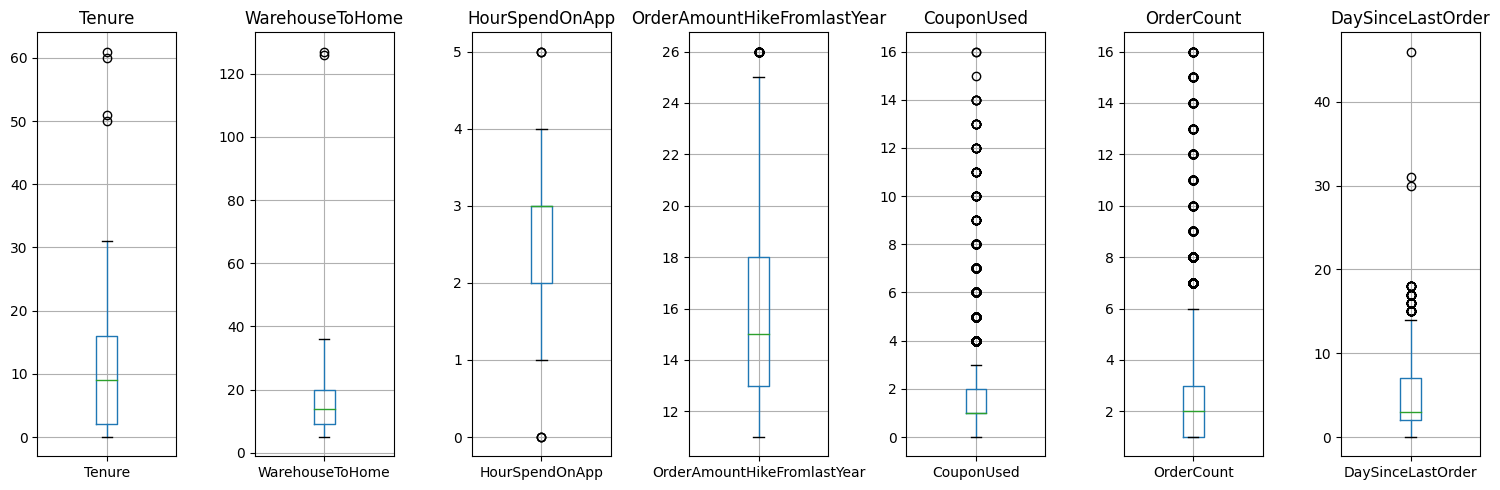

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=len(df_box.columns), figsize=(15, 5))

for i, column in enumerate(df_box.columns):
    df_box.boxplot(column=[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [29]:
median_values = df_box.median()
print(median_values)

Tenure                          9.0
WarehouseToHome                14.0
HourSpendOnApp                  3.0
OrderAmountHikeFromlastYear    15.0
CouponUsed                      1.0
OrderCount                      2.0
DaySinceLastOrder               3.0
dtype: float64


I used the median because the median itself is not sensitive to outliers in contrast to the mean which is very sensitive to outliers, therefore in this case I chose to use the median.

In [30]:
df['Tenure'].fillna(df.Tenure.median(), inplace=True)
df['WarehouseToHome'].fillna(df.WarehouseToHome.median(), inplace=True)
df['HourSpendOnApp'].fillna(df.HourSpendOnApp.median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(round(df.OrderAmountHikeFromlastYear.median()), inplace=True)
df['CouponUsed'].fillna(df.CouponUsed.median(), inplace=True)
df['OrderCount'].fillna(df.OrderCount.median(), inplace=True)
df['DaySinceLastOrder'].fillna(df.DaySinceLastOrder.median(), inplace=True)

In [31]:
miss_df = df.isnull().sum()
print(miss_df)

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


#### **Feature Engineering**

In [32]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['PreferredLoginDevice']=label_encoding.fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode']=label_encoding.fit_transform(df['PreferredPaymentMode'])
df['Gender']=label_encoding.fit_transform(df['Gender'])
df['PreferedOrderCat']=label_encoding.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus']=label_encoding.fit_transform(df['PreferredPaymentMode'])

In [33]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,1,1,8.0,4,1,3.0,4,3,3,4,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,1,1,12.0,1,1,3.0,3,3,5,1,3,0,11.0,1.0,1.0,3.0,130


#### **Split Data into Train and Test Data**

In [34]:
X=df.drop('Churn',axis=1)
Y=df['Churn']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### **Model**

**Decision Tree**

In [36]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [37]:
DT.fit(x_train, y_train)
DT_Predict=DT.predict(x_test)

In [38]:
from sklearn.metrics import classification_report
print('\nDecision Tree\n')
print(classification_report(y_test, DT_Predict))


Decision Tree

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       939
           1       0.86      0.90      0.88       187

    accuracy                           0.96      1126
   macro avg       0.92      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126



Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [40]:
LR.fit(x_train, y_train)
LR_Predict=DT.predict(x_test)

In [41]:
print('\nLogistic Regression\n')
print(classification_report(y_test, LR_Predict))


Logistic Regression

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       939
           1       0.86      0.90      0.88       187

    accuracy                           0.96      1126
   macro avg       0.92      0.94      0.93      1126
weighted avg       0.96      0.96      0.96      1126



**K Nearest Neighbor**

In [42]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
KNN_Predict=KNN.predict(x_test)

In [44]:
print('\nKNN\n')
print(classification_report(y_test, KNN_Predict))


KNN

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       939
           1       0.63      0.42      0.50       187

    accuracy                           0.86      1126
   macro avg       0.76      0.68      0.71      1126
weighted avg       0.85      0.86      0.85      1126



**Tuned KNN**

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
      'n_neighbors': [3, 5, 7, 9, 11],
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'manhattan']
      }

knn = KNeighborsClassifier()

In [47]:
TunedKNN = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
TunedKNN.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [57]:
TunedKNN_Predict=TunedKNN.predict(x_test)

In [85]:
best_params = TunedKNN.best_params_


print("Best Parameters:", best_params)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [59]:
BestKNN = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 5, weights ='distance')
BestKNN.fit(x_train, y_train)
TunedKNN_Predict=TunedKNN.predict(x_test)

In [84]:
print('\nTuned KNN\n')
print(classification_report(y_test, TunedKNN_Predict))


Tuned KNN

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       939
           1       0.90      0.86      0.88       187

    accuracy                           0.96      1126
   macro avg       0.94      0.92      0.93      1126
weighted avg       0.96      0.96      0.96      1126



**Naive Bayes**

In [76]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)

GaussianNB()

In [77]:
NB_Predict=NB.predict(x_test)

In [78]:
print('\nNaïve Bayes\n')
print(classification_report(y_test, NB_Predict))


Naïve Bayes

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       939
           1       0.55      0.53      0.54       187

    accuracy                           0.85      1126
   macro avg       0.73      0.72      0.72      1126
weighted avg       0.85      0.85      0.85      1126



**Tuned Naïve Bayes**

In [82]:
param_grid = {
      'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
      }


nb = GaussianNB()


TunedNB = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
TunedNB.fit(x_train, y_train)

TunedNB_Predict=TunedNB.predict(x_test)

In [83]:
print('\nTuned Naïve Bayes\n')
print(classification_report(y_test, TunedNB_Predict))


Tuned Naïve Bayes

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       939
           1       0.55      0.53      0.54       187

    accuracy                           0.85      1126
   macro avg       0.73      0.72      0.72      1126
weighted avg       0.85      0.85      0.85      1126



**Random Forest**

In [54]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
RF_Predict=RF.predict(x_test)

In [56]:
print('\nRandom Forest\n')
print(classification_report(y_test, RF_Predict))


Random Forest

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       939
           1       0.95      0.89      0.92       187

    accuracy                           0.98      1126
   macro avg       0.97      0.94      0.95      1126
weighted avg       0.97      0.98      0.97      1126

